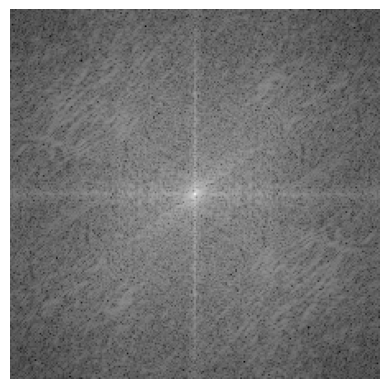

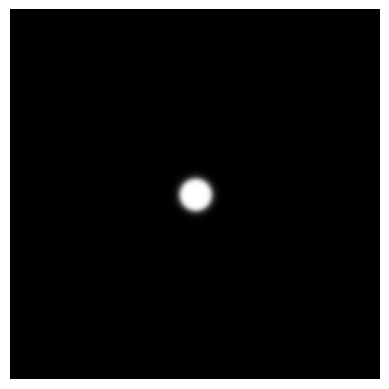

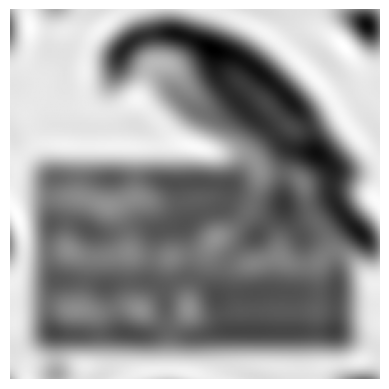

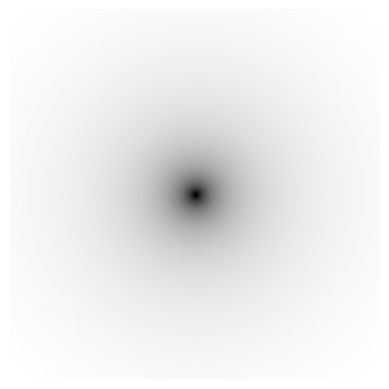

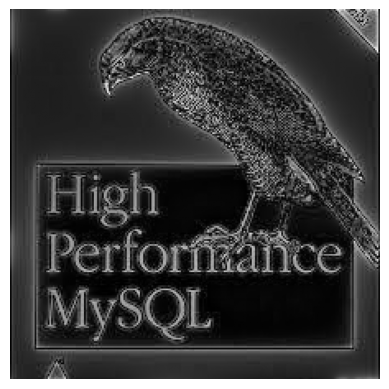

In [41]:
# Libraries
#butter worth
import cv2
import numpy as np
import matplotlib.pyplot as plt
# open the image
f = cv2.imread('original image.jpeg',0)
# transform image into freq. domain and shifted
F = np.fft.fft2(f)
Fshift = np.fft.fftshift(F)

plt.imshow(np.log1p(np.abs(Fshift)), cmap='gray')
plt.axis('off')
plt.show()


# Butterwort Low Pass Filter
M,N = f.shape
H = np.zeros((M,N), dtype=np.float32)
D0 = 10 # cut of frequency
n = 10 # order
for u in range(M):
 for v in range(N):
    D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
 #The filter mask H is designed to pass low frequencies with weights decreasing as D increases beyond D0.
    H[u,v] = 1 / (1 + (D/D0)**n)

plt.imshow(H, cmap='gray')
plt.axis('off')
plt.show()
# frequency domain image filters
Gshift = Fshift * H
G = np.fft.ifftshift(Gshift)
#The filtered image (g) is obtained by performing inverse FFT on the shifted and filtered spectrum.
g = np.abs(np.fft.ifft2(G))



plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()
# Butterworth High Pass Filter
HPF = np.zeros((M,N), dtype=np.float32)
D0 = 10
n = 1
for u in range(M):
 for v in range(N):
    D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
    HPF[u,v] = 1 / (1 + (D0/D)**n)

plt.imshow(HPF, cmap='gray')
plt.axis('off')
plt.show()
# frequency domain image filters
Gshift = Fshift * HPF
G = np.fft.ifftshift(Gshift)
g = np.abs(np.fft.ifft2(G))
plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()


In [ ]:
# lab 6 Ideal Low-Pass and High-Pass Filters in the frequency domain using Fourier Transform techniques.
import cv2 as cv
import matplotlib.pyplot as plt 
import numpy as np

f = cv.imread('original image.jpeg',0)
#Displays the original image using imshow from Matplotlib with gray colormap.
plt.imshow(f, cmap='gray')
plt.axis('off')
plt.show()


# image in frequency domain
#Performs Fast Fourier Transform (FFT) on the image using np.fft.fft2 and stores the result in F.
F = np.fft.fft2(f)

#Applies np.log1p to the absolute value of F for better visualization and displays it with imshow and gray colormap.
plt.imshow(np.log1p(np.abs(F)),
 cmap='gray')
plt.axis('off')
plt.show()

#Shifts the zero-frequency component to the center using np.fft.fftshift and stores it in Fshift.
Fshift = np.fft.fftshift(F)
#Displays the shifted frequency domain image using imshow and gray colormap.
plt.imshow(np.log1p(np.abs(Fshift)),
 cmap='gray')
plt.axis('off')
plt.show()



# Filter: Low pass filter
M,N = f.shape
#Initializes an empty filter mask H with the same size as the original image f.
H = np.zeros((M,N), dtype=np.float32)
#Defines a cut-off radius D0 (50 in this case) for the low-pass filter.
D0 = 50.
#Iterates through each pixel in the frequency domain:
for u in range(M):
 for v in range(N):
 #Calculates the distance D from the center frequency (u,v) to the origin.
    D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
 #If D is less than or equal to D0, sets the corresponding pixel in H to 1 (passing low frequencies).
    if D <= D0:
        H[u,v] = 1
    else:
 #Otherwise, sets the pixel to 0 (blocking high frequencies).
        H[u,v] = 0

plt.imshow(H, cmap='gray')
plt.axis('off')
plt.show()
# Ideal Low Pass Filtering
#Multiplies the shifted image spectrum Fshift with the low-pass filter mask H..
Gshift = Fshift * H
#Displays the filtered frequency domain image using imshow and gray colormap.
plt.imshow(np.log1p(np.abs(Gshift)),
 cmap='gray')
plt.axis('off')
plt.show()
# Inverse Fourier Transform
#Performs inverse Fast Fourier Transform (IFFT) on the shifted filteredspectrum Gshift using np.fft.ifftshift and stores it in G.
G = np.fft.ifftshift(Gshift)
#Displays the absolute value of the IFFT result G using imshow and gray colormap
plt.imshow(np.log1p(np.abs(G)),
 cmap='gray')
plt.axis('off')
plt.show()

#Applies inverse IFFT on G using np.fft.ifft2 and stores the absolute value in g.
g = np.abs(np.fft.ifft2(G))
#Displays the final filtered image g using imshow and gray colormap.
plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()


# Filter: High pass filter
#Inverts the low-pass filter mask H to create a high-pass filter mask by subtracting it from 1.
H = 1 - H
#Displays the high-pass filter mask using imshow and gray colormap.
plt.imshow(H, cmap='gray')
plt.axis('off')
plt.show()
# Ideal High Pass Filtering
#Follows the same steps as the ideal low pass filtering, but using the highpass filter mask H.
Gshift = Fshift * H
plt.imshow(np.log1p(np.abs(Gshift)),
 cmap='gray')
plt.axis('off')
plt.show()
# Inverse Fourier Transform
G = np.fft.ifftshift(Gshift)
plt.imshow(np.log1p(np.abs(G)),
 cmap='gray')
plt.axis('off')
plt.show()
g = np.abs(np.fft.ifft2(G))
plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()

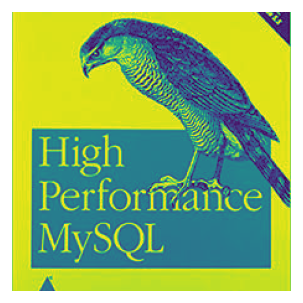

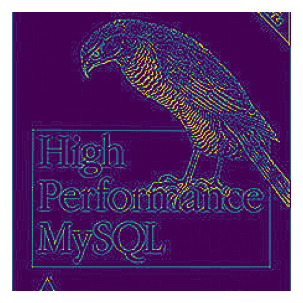

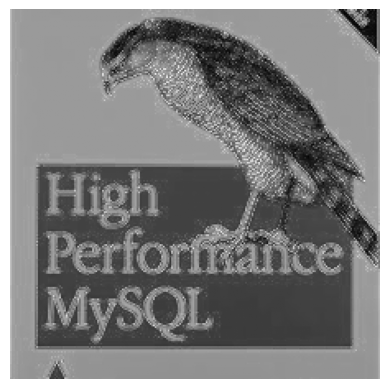

In [ ]:
# lab 5 / laplication filter علشان نبين بيه الحواف 
import cv2 as cv
import matplotlib.pyplot as plt 
import numpy as np
img = cv.imread('original image.jpeg',0)
plt.figure(figsize=(3,4),dpi=120)
plt.imshow(img)
plt.axis('off')
plt.show()

#laplication 
#kernel:

# هذا هو مرشح لابلاسي Laplacian التقليدي للكشف عن الحواف، يعتمد على التفاضل الثاني.

# يعطيك فكرة عن التغيرات الحادة في الصورة (الحواف)، حيث تبرز الأماكن التي يتغير فيها اللون أو الإضاءة بشكل كبير.

# cv.filter2D(img, -1, kernel):

# يطبق الفلتر على الصورة.

# -1 تعني أن نوع البيانات الناتجة سيكون مثل الأصل (أي نفس نوع img).

# لأن الصورة الأصلية ملونة (3 قنوات)، فإن الفلتر يُطبّق على كل قناة لونية على حدة.

# plt.imshow(lablasianImg, cmap='gray'):

# هنا خطأ بسيط في الاستخدام:

# cmap='gray' يُستخدم عادةً فقط مع الصور ذات القناة الواحدة (رمادية).

# لكن lablasianImg لا تزال ملونة (3 قنوات)، لذا استخدام cmap='gray' ليس له تأثير حقيقي.

kernel = np.array([[0,1,0],[1,-4,1],[0,1,0]])
lablasianImg = cv.filter2D(img,-1,kernel)
plt.figure(figsize=(3,4),dpi=120)
plt.imshow(lablasianImg)
plt.axis('off')
plt.show()

# clip حواف
# إذا كان c = -1: فهي زيادة الحدة (Sharpening).
# إذا كان c = +1: فهي تنعيم أو إزالة الحواف (أقل استخدامًا).
c = +1
g=img.astype(np.int16) + c * lablasianImg.astype(np.int16)
plt.Figure(figsize=(3,4),dpi=120)
plt.imshow(g,cmap='gray')
plt.axis('off')
plt.show()


# gClip = np.clip(g,0,225)
# plt.Figure(figsize=(3,4),dpi=120)
# plt.imshow(gClip,cmap='gray')
# plt.axis('off')
# plt.show()


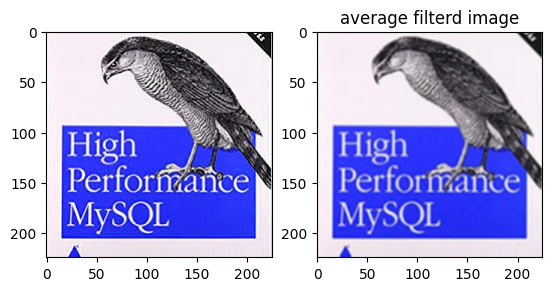

In [29]:
# lab-4 / median filter 
import cv2 as cv
import matplotlib.pyplot as plt 
import numpy as np
img = cv.imread('original image.jpeg')
average_img = cv.blur(img,(3,3))
fig,a = plt.subplots(nrows=1,ncols=2)
a[0].imshow(img)
a[1].imshow(average_img)
plt.title("average filterd image")
cv.waitKey(0)
cv.destroyAllWindows()


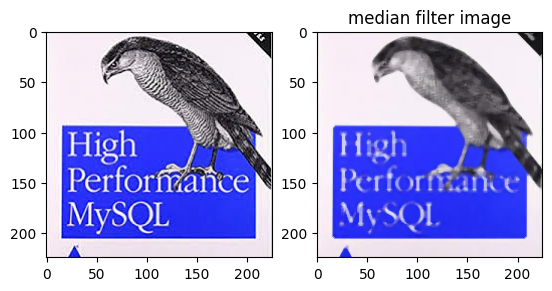

In [28]:
# lab-4 / median filter 
import cv2 as cv
import matplotlib.pyplot as plt 
import numpy as np
img = cv.imread('original image.jpeg')
dilated_img = cv.medianBlur(img,5)
fig,a = plt.subplots(nrows=1,ncols=2)
a[0].imshow(img)
a[1].imshow(dilated_img)
plt.title("median filter image")
cv.waitKey(0)
cv.destroyAllWindows()


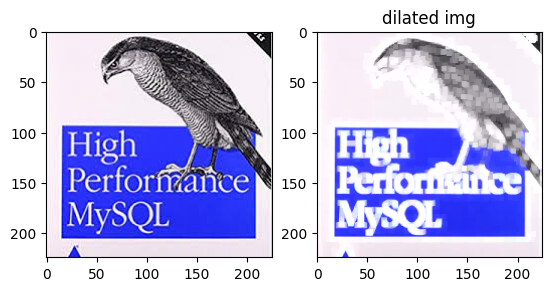

In [27]:
# lab-4 / dilate / التوسيع
import cv2 as cv
import matplotlib.pyplot as plt 
import numpy as np
img = cv.imread('original image.jpeg')
kernal = np.ones((5,5),np.float32)/25
dilated_img = cv.dilate(img,kernal)
fig,a = plt.subplots(nrows=1,ncols=2)
a[0].imshow(img)
a[1].imshow(dilated_img)
plt.title("dilated img")
cv.waitKey(0)
cv.destroyAllWindows()


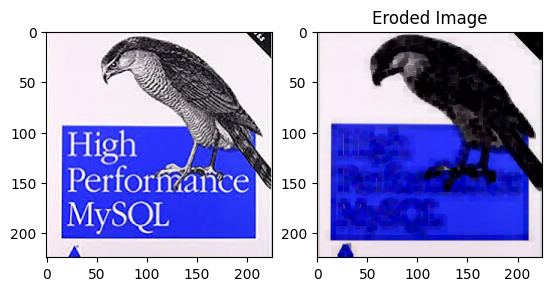

In [26]:
# lab-4 / Erosion / فلتر التأكل
import cv2 as cv
import matplotlib.pyplot as plt 
import numpy as np
img = cv.imread('original image.jpeg')
kernal = np.ones((5,5),np.float32)/25
eroded_img = cv.erode(img,kernal)
fig,a = plt.subplots(nrows=1,ncols=2)
a[0].imshow(img)
a[1].imshow(eroded_img)
plt.title("Eroded Image")
cv.waitKey(0)
cv.destroyAllWindows()


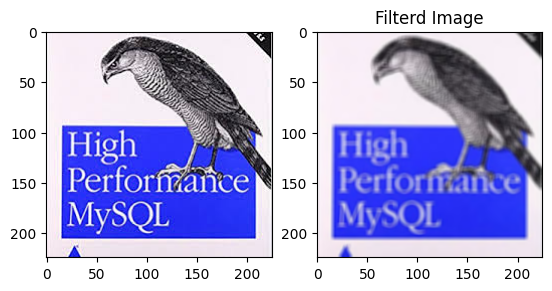

In [25]:
# lab-4 / (blurring filter) / فلتر التمويه
import cv2 as cv
import matplotlib.pyplot as plt 
import numpy as np

img = cv.imread('original image.jpeg')
kernal = np.ones((5,5),np.float32)/25
imgFilterd = cv.filter2D(img,-1,kernal)

fig,a = plt.subplots(nrows=1,ncols=2)
a[0].imshow(img)
a[1].imshow(imgFilterd)
plt.title("Filterd Image")
cv.waitKey(0)
cv.destroyAllWindows()


In [16]:
# lab-3
import cv2 as cv

img = cv.imread('original image.jpeg')

img_2 = img/50
cv.imshow('image / 2 ',img_2)
cv.waitKey(0)
cv.destroyAllWindows()



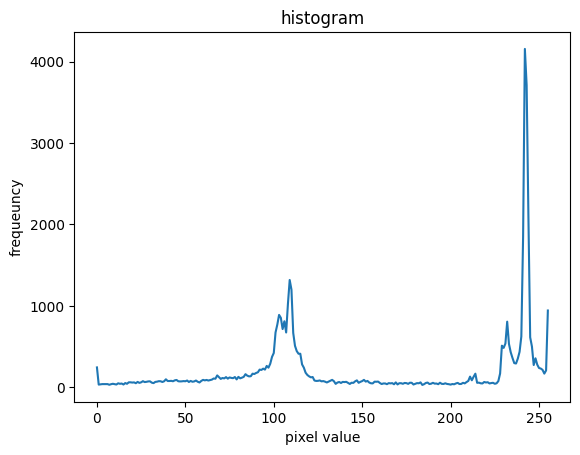

In [6]:
# lab-3
import cv2 as cv
import matplotlib.pyplot as plt 

img = cv.imread('original image.jpeg',cv.IMREAD_GRAYSCALE)
histogram = cv.calcHist([img],[0],None,[256],[0,256])
plt.plot(histogram)
plt.title('histogram')
plt.xlabel('pixel value')
plt.ylabel('frequeuncy')
plt.show()


In [ ]:
# lab-2 / change colors

# read gbr for image 
import cv2 as cv
import numpy as np
img = cv.imread('original image.jpeg')
blue,green,red = cv.split(img)
merged = cv.merge([blue,green,red])
zero_blue = np.zeros_like(blue)
zero_green = np.zeros_like(green)
zero_red = np.zeros_like(red)

cv.imshow('red',cv.merge([zero_blue,zero_green,red]))
cv.imshow('green',cv.merge([zero_blue,green,zero_red]))
cv.imshow('blue',cv.merge([blue,zero_green,zero_red]))
cv.imshow('original',img)
cv.imshow('merged',merged)
cv.waitKey(0)
cv.destroyAllWindows()

In [ ]:
# lab-2 / read gbr for image 
import cv2 as cv
import numpy as np
img = cv.imread('original image.jpeg')
blue,green,red = cv.split(img)
cv.imshow('blue',blue)
cv.imshow('green',green)
cv.imshow('red',red)
cv.imshow('original',img)
cv.waitKey(0)
cv.destroyAllWindows()